In [1]:
from transformers import AutoModelForMaskedLM, AutoTokenizer
# Load the saved model and tokenizer
loadstr = '/home/ubuntu/bstadt-tlm/tlm/tlm-2025-08-05_16-42-11/checkpoint-10500/'
model = AutoModelForMaskedLM.from_pretrained(loadstr)
#tokenizer = BertTokenizerFast.from_pretrained('../coca_tokenized/tokenizer/')
tokenizer = AutoTokenizer.from_pretrained(loadstr)

In [2]:
import torch
import torch.nn.functional as F
def lyear(phrase, model, tokenizer):
    model.eval()

    years = list(range(1990, 2020))
    year_fills = ['[YEAR:{}]'.format(year) for year in years]
    year_fill_token_ids = [tokenizer.encode(e)[1] for e in year_fills]
    year_template = '[MASK] ' + phrase
    
    input_ids = tokenizer.encode(year_template, add_special_tokens=False, return_tensors='pt')
    with torch.no_grad():
        outputs = model(input_ids=input_ids)
        logits = outputs.logits[0][0]
        year_sublogits = logits[year_fill_token_ids]
        year_subprobs = F.softmax(year_sublogits, dim=0)

    return years, year_sublogits, year_subprobs

In [3]:
from matplotlib import pyplot as plt
def pyear_given_slotfill(phrase, template, model, tokenizer, title, annotate=None, annotate_text=None):
    years, fill_year_logits, fill_year_probs = lyear(phrase, model, tokenizer)
    _, template_year_logits, template_year_probs = lyear(template, model, tokenizer)
    bayes_factors = fill_year_probs/template_year_probs

    plt.figure()
    plt.title(title)
    plt.ylabel('Bayes Factor')
    plt.xlabel('Year')
    plt.plot(years, bayes_factors)
    plt.legend()

    if annotate != None:
        plt.axvspan(annotate[0], annotate[1], alpha=0.3, color='green')
        if annotate_text != None:
            plt.text(annotate[0], 0, annotate_text, ha='left', va='bottom')


    plt.show()

/tmp/ipykernel_148955/63049280.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


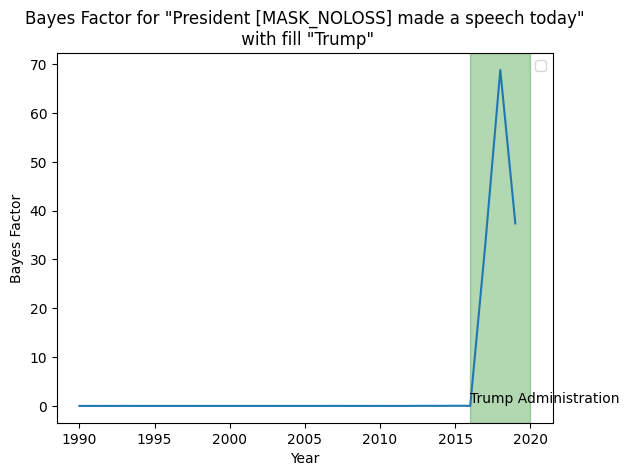

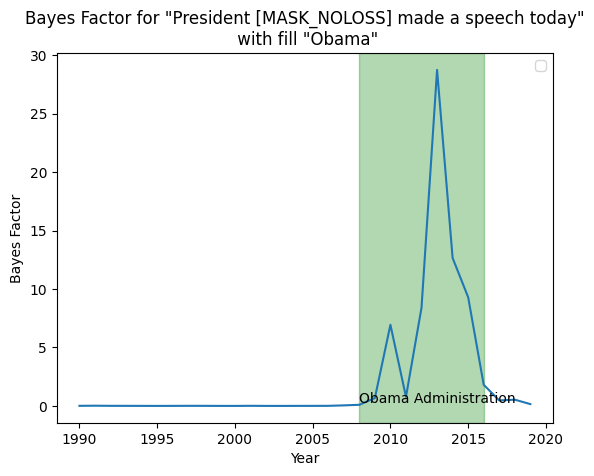

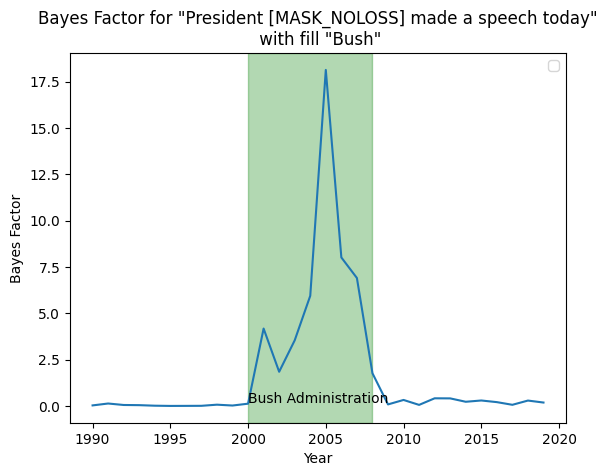

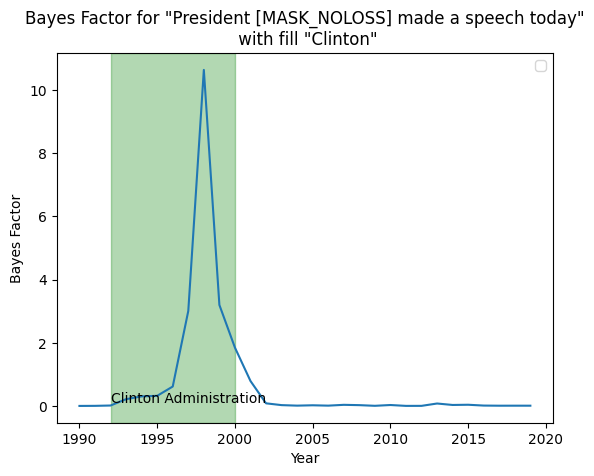

In [4]:
template = 'President [MASK_NOLOSS] made a speech today'
pyear_given_slotfill('President Trump made a speech today', template, model, tokenizer,
 title='Bayes Factor for "' + template + '"\n with fill "Trump"',
 annotate=(2016, 2020), annotate_text='Trump Administration')
pyear_given_slotfill('President Obama made a speech today', template, model, tokenizer,
 title='Bayes Factor for "' + template + '"\n with fill "Obama"',
 annotate=(2008, 2016), annotate_text='Obama Administration')
pyear_given_slotfill('President Bush made a speech today', template, model, tokenizer,
 title='Bayes Factor for "' + template + '"\n with fill "Bush"',
 annotate=(2000, 2008), annotate_text='Bush Administration')
pyear_given_slotfill('President Clinton made a speech today', template, model, tokenizer,
 title='Bayes Factor for "' + template + '"\n with fill "Clinton"',
 annotate=(1992, 2000), annotate_text='Clinton Administration')

/tmp/ipykernel_148955/63049280.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


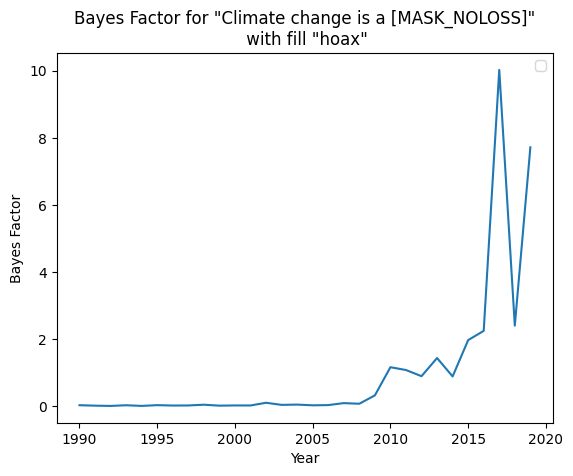

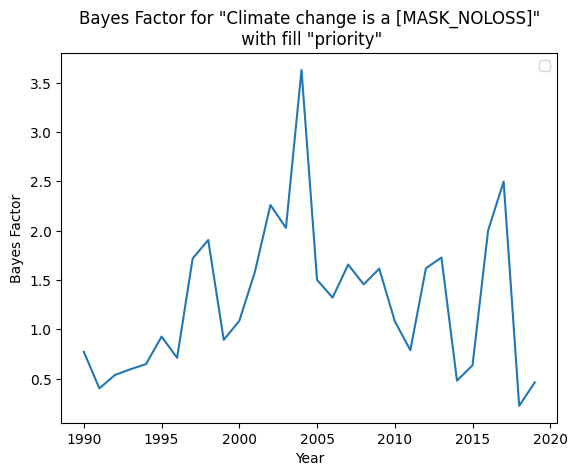

In [5]:
template = 'Climate change is a [MASK_NOLOSS]'
pyear_given_slotfill('Climate change is a hoax', template, model, tokenizer,
 title='Bayes Factor for "' + template + '"\n with fill "hoax"')
pyear_given_slotfill('Climate change is a priority', template, model, tokenizer,
 title='Bayes Factor for "' + template + '"\n with fill "priority"')